In [1]:
import pickle
import matplotlib.pyplot as plt

with open("./saves/basic_model/losses.pkl", "rb") as f:
    basic_data = pickle.load(f)
with open("./saves/individual_finetuned_model/losses.pkl", "rb") as f:
    ind_tuned_data = pickle.load(f)
with open("./saves/combined_finetuned_model/losses.pkl", "rb") as f:
    combo_tuned_data = pickle.load(f)

for key in basic_data.keys():
    print(f"Key: {key}\tNormal Model:{basic_data[key][-1]}\tFine Tuned Model: {ind_tuned_data[key][-1]}")

labels = ["Training Loss", "Normal Validation Loss", "Children Validation Loss", "Stutter Validation Loss"]

Key: tr_losses	Normal Model:0.012677574852213304	Fine Tuned Model: 0.010130951631124065
Key: losses_normal	Normal Model:0.023500058160344554	Fine Tuned Model: 0.055511493748053906
Key: losses_children	Normal Model:0.12100547427932422	Fine Tuned Model: 0.00831743779902657
Key: losses_stutter	Normal Model:6.596882519656664	Fine Tuned Model: 5.407294436676861


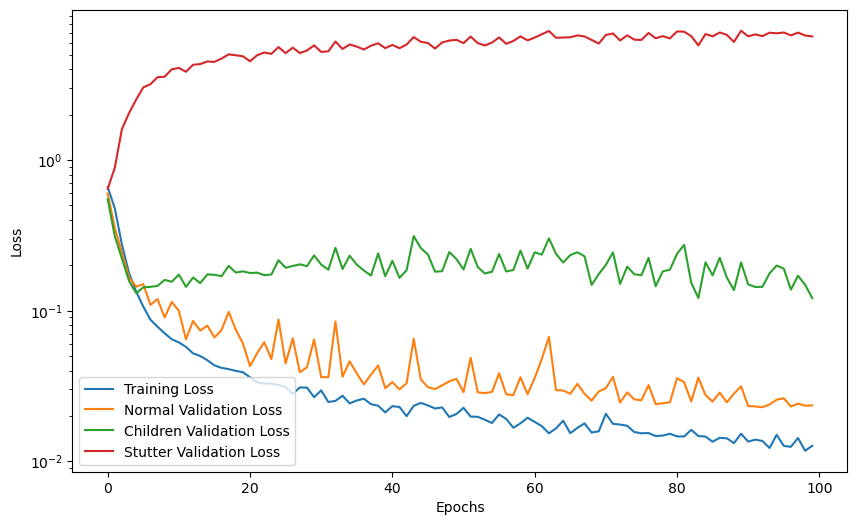

In [2]:
plt.figure(figsize=(10, 6))
for i, (key, losses) in enumerate(basic_data.items()):
    plt.plot(losses, label=labels[i])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

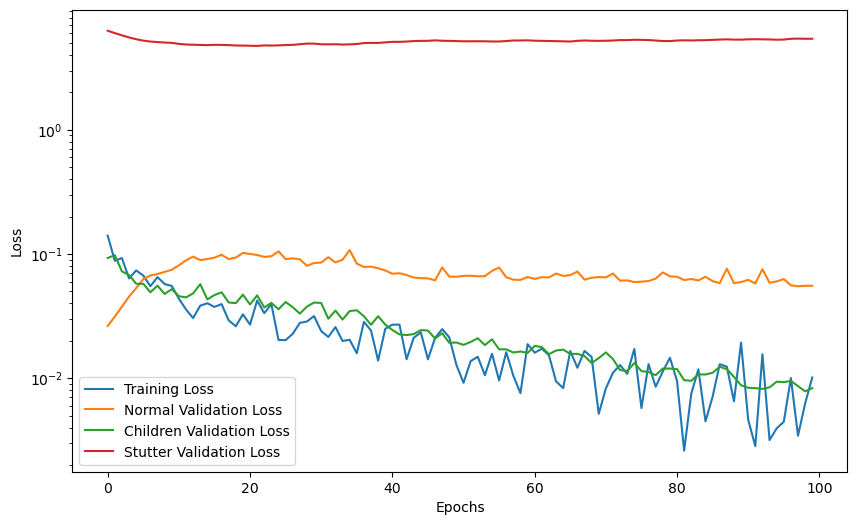

In [3]:
plt.figure(figsize=(10, 6))
for i, (key, losses) in enumerate(ind_tuned_data.items()):
    plt.plot(losses, label=labels[i])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

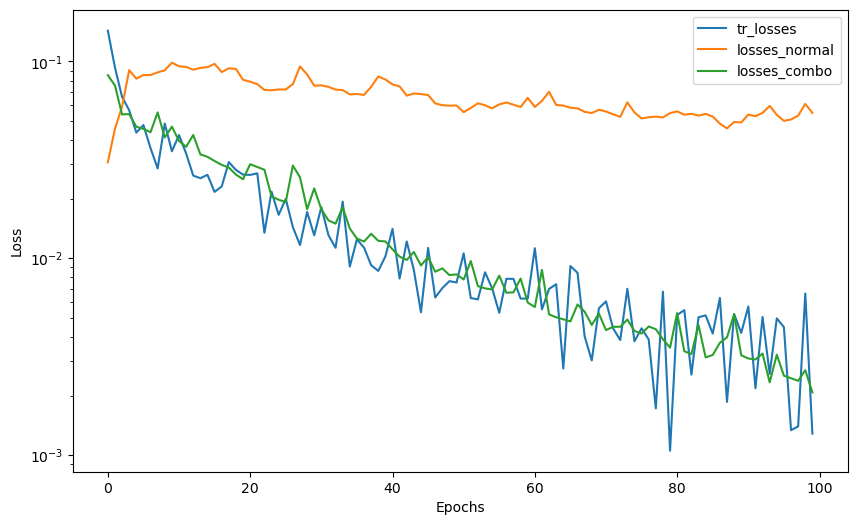

In [4]:
labels = ["Training Losses", "Normal Validation Loss", "Combined Validation Loss"]
plt.figure(figsize=(10, 6))
for i, (key, losses) in enumerate(combo_tuned_data.items()):
    plt.plot(losses, label=key)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

In [6]:
from inference import infer

for ds in ["Normal", "Children", "Stutter"]:
    print(infer(f"/scratch/mrl78/AdversarialAIFP/Data/{ds}/testing", "/scratch/mrl78/AdversarialAIFP/saves/combined_finetuned_model/model_just_mlp.pt"))

9.751662075519562
5.791189323645085e-06


RuntimeError: stack expects each tensor to be equal size, but got [32000] at entry 0 and [31998] at entry 63